<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

### Exploratory Data Analysis II

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [shape](#section301)<br/>
    - 3.2 [dtypes](#section302)<br/>
    - 3.3 [column](#section303)<br/>
    - 3.4 [head](#section304)<br/>
    - 3.5 [describe](#section305)<br/>
    - 3.6 [sample](#section306)<br/>
    - 3.7 [Pandas profiling](#section307)<br/>
    - 3.8 [Initial observations](#section308)<br/>
    - 3.9 [Final observations](#section309)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Data correction for the field 'name'](#section401)<br/>
    - 4.2 [Missing data and its imputation](#section402)<br/>
    
    
- 5. [Identify patterns in the data](#section5)</br>
    
- 6. [Analysis through questions](#section6)</br>
     
        
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 

## 1. Problem Statement ! 

This data set is from a survey on the Food chain restaurants through out the USA. 

<a id=section101></a>

### 1.1. Introduction

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a>

### 1.2. Data source and dataset

__a__. Dataset details:

- __Name__: "FastFoodRestaurants"
- __Description__: With over 500 fastfood restaurant all over the USA with  address,postal code,city and province.

__b__. Is it a sample? If yes, was it properly sampled?

- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a>

### 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [2]:
import sys                                                                      # Import packages
import pandas as pnd
import seaborn as sns
import numpy as np
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 

df= pnd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv')


<a id=section3></a>

### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a>

In [3]:
df.shape                                     #To get the row and column number including index

(10000, 10)

<a id=section302></a>

In [4]:
df.dtypes 

address        object
city           object
country        object
keys           object
latitude      float64
longitude     float64
name           object
postalCode     object
province       object
websites       object
dtype: object

<a id=section303></a>

In [5]:
df.columns                         #to get the types of column in the data set

Index(['address', 'city', 'country', 'keys', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'websites'],
      dtype='object')

<a id=section304></a>

In [6]:
df.head(50)                                   #To get top 10 rows of data set

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
5,4182 Tonya Trl,Hamilton,US,us/oh/hamilton/4182tonyatrl/-1055723171,39.417600,-84.476410,Domino's Pizza,45011,OH,"https://www.dominos.com/en/?redirect=homepage,..."
6,590 S Main St,Englewood,US,us/oh/englewood/590smainst/-1055723171,39.869690,-84.293580,Domino's Pizza,45322,OH,https://www.dominos.com/en/?redirect=homepagea...
7,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.005980,-81.770400,McDonald's,29138,SC,http://www.mcdonalds.com
8,205 W Church St,Batesburg,US,us/sc/batesburg/205wchurchst/-791445730,33.913350,-81.533300,Wendy's,29006,SC,http://www.wendys.com
9,2711 W. Kings Highway Ste. 18,Paragould,US,us/ar/paragould/2711wkingshighwayste18/-66712705,36.061070,-90.523250,Pizza Hut,72450,AR,http://www.pizzahut.com


<a id='section305'></a>

<a id=section304></a>

In [7]:
df.describe(include = 'all')  

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,3900 Las Vegas Blvd S,Cincinnati,US,us/ca/placentia/797worangethorpeave/-230519289,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN


### Observations:

 We can see from the 1st row only missing values are present in website column. For the same we need to put the valid data or clean the data where necessary.We have done this in section below. Most of the columns are non numeric except postal code,latitude and longitude. These are specific for each location.

<a id=section306></a>

In [8]:
df.sample(10)

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
9198,5710 N Academy Blvd,Colorado Springs,US,us/spgs/coloradosprings/5710nacademyblvd/93075755,38.913264,-104.788447,Arby's,80907,Co Spgs,http://arbys.com
8712,1243 Austin Hwy,San Antonio,US,us/tx/sanantonio/1243austinhwy/1832448210,29.488710,-98.444700,Whataburger,78209,TX,https://locations.whataburger.com/tx/san-anton...
7447,6618 Sawmill Rd,Columbus,US,us/oh/columbus/6618sawmillrd/-1947870258,40.102720,-83.090530,Jimmy John's,43235,OH,"http://www.jimmyjohns.com,http://jimmyjohns.com"
9028,726 SW Federal Hwy,Stuart,US,us/fl/stuart/726swfederalhwy/-791445730,27.192845,-80.256347,Wendy's,34994,FL,http://www.wendys.com
9073,2600 Alverado,San Leandro,US,us/ca/sanleandro/2600alverado/729119187,37.710784,-122.156058,Fosters Freeze,94577,CA,http://fostersfreeze.com
4844,516 Broadway,Bayonne,US,us/nj/bayonne/516broadway/106088,40.664500,-74.117500,KFC,7002,NJ,http://www.kfc.com
874,3213 Princeton Rd,Hamilton,US,us/oh/hamilton/3213princetonrd/-791445730,39.390460,-84.508200,Wendy's,45011,OH,https://locations.wendys.com/indian-springs-oh...
1804,2080 County Road C W,Saint Paul,US,us/mn/saintpaul/2080countyroadcw/-2061630068,45.020170,-93.188020,Burger King,55113,MN,https://locations.bk.com/mn/roseville/2080-wes...
6825,19480 Van Dyke,Detroit,US,us/mi/detroit/19480vandyke/-1161002137,42.440867,-83.023911,McDonald's,48234,MI,http://mcdonalds.com
4908,1228 Park Ave,Meadville,US,us/pa/meadville/1228parkave/-864103396,41.630300,-80.155980,Taco Bell,16335,PA,"http://www.tacobell.com,https://locations.taco..."


<a id=section307></a>

In [10]:
import pandas_profiling  as pnd_prof
profile= pnd_prof.ProfileReport(df)
profile.to_file(outputfile="fastfoodRestDataBeforeProcessing.html")

<a id=section308></a>

### Initial Observation:

Summary of data types in this dataset:

- <em> Numeric (Float)</em>: Latitude ,Longitude    
- <em> Object</em>: Everything else

- <strong>address</strong>:  address are mostly distinct and it is normal.         
- <strong>city</strong>:     No missing values. 2775 distinct cities are there.                 
- <strong>Country</strong>:  No missing values. Only value is 'US'.                     
- <strong>Name</strong>:     No missing values. 548 distinct values. We need to check if distinct values are correct or wrong.
    
- <strong>Postal code</strong>: No missing values. 5289 distinct values.              
- <strong>province</strong>: No missing values. 52 distinct values.                    
- <strong>websites</strong>: 465 missing values are there. For the same we need to put the valid data or clean the data.        




In [4]:
Total = df.isnull().sum().sort_values(ascending=False)     # Missing values
#total
Percent= (df.isnull().sum()/df.isnull().count().sort_values()).sort_values(ascending=False)
Missing_data= pnd.concat([Total,Percent],axis=1,keys=['Total','Percent'])
print(Missing_data)

            Total  Percent
websites      465   0.0465
province        0   0.0000
postalCode      0   0.0000
name            0   0.0000
longitude       0   0.0000
latitude        0   0.0000
keys            0   0.0000
country         0   0.0000
city            0   0.0000
address         0   0.0000


In [5]:
df_mcDonald= df[df['keys'].str.contains("1161002137")==True]    # data with unique key for McDonald's
McDname= df_mcDonald.name.unique()                              # How many types of  names are there for McDonald's?
print(McDname)

["McDonald's" 'McDonalds' "Mcdonald's" "Mc Donald's" 'Mcdonalds'
 'Mc Donalds' 'McDonald’s']


In [6]:
df_kfc= df[df['name'].str.contains("Kentucky")==True]               #How many types of names present for KFC
Kfcname= df_kfc.name.unique()
print(Kfcname)

['KFC - Kentucky Fried Chicken' 'Kentucky Fried Chicken'
 'Kfc - Kentucky Fried Chicken']


<a id=section309></a>

### Final Observation:

1. NaN values in 'websites' field need to be filled up with correct values those are available in other rows of the data set.
2. Same restaurant have different values in 'name' field that need to be ractified.

<a id=section4></a>

### Data Normalisation:

<a id=section401></a>

### Name field data correction:

In [7]:
for (row, col) in df.iterrows():                                        # Updated with an unique name for Mcdonald's
        
    if df.name.iloc[row] in McDname:
        df['name'].replace(to_replace= df.name.iloc[row], value="McDonald's", inplace=True)
        
print(df.name[df['keys'].str.contains("1161002137")==True].unique())

["McDonald's"]


In [8]:
df_kfc= df[df['name'].str.contains("Kentucky")==True]               # Updated with an unique name for KFC
Kfcname= df_kfc.name.unique()
for (row, col) in df.iterrows():
        
    if df.name.iloc[row] in Kfcname:
        df['name'].replace(to_replace= df.name.iloc[row], value="KFC", inplace=True)
        
print(df.name[df['name'].str.contains("KFC")==True].unique())

['KFC' 'KFC / Taco Bell' 'KFC/Taco Bell' 'KFC / A&W']


Observation: Still we can see some confusing names are there for KFC. In the name both KFC and Taco Bell are there for these rows. We need to rectify the name based on the other data present in the respective rows.

In [9]:
df[['name','websites']][df['keys'].str.contains("1278244220")==True]  # Name and websites for those rows

,name,websites
546,KFC / Taco Bell,http://www.kfc.com
3062,KFC / Taco Bell,http://www.tacobell.com
6212,KFC/Taco Bell,http://www.kfc.com
6958,KFC / Taco Bell,"http://www.kfc.com,http://kfc.com"
7105,KFC/Taco Bell,"http://www.kfc.com,http://kfc.com"


Based on the websites description, we can conclude and modify the following
-<br>http://www.kfc.com</br>  should be for KFC
-<br>http://www.tacobell.com should be for Taco Bell</br>


In [10]:
df['name'].replace(to_replace= df.name.iloc[546], value="KFC", inplace=True)   #Replace with proper value
df['name'].replace(to_replace= df.name.iloc[3062], value="Taco Bell", inplace=True)
df['name'].replace(to_replace= df.name.iloc[6212], value="KFC", inplace=True)
df['name'].replace(to_replace= df.name.iloc[6958], value="KFC", inplace=True)
df['name'].replace(to_replace= df.name.iloc[7105], value="KFC", inplace=True)
print(df.name[df['name'].str.contains("KF")==True].unique())


['KFC' 'KFC / A&W']


In [11]:
print(df[['name','websites']][df['name'].str.contains("KFC / A&W")==True])  

           name websites
8023  KFC / A&W      NaN


In [12]:
#From the KFC/A&W details it is difficult to predict the actual name. so data row needs to be removed.
df.drop(df.index[[8023]],inplace=True)
print(df.name[df['name'].str.contains("KF")==True].unique())

['KFC']


In [13]:
print(df.name[df['name'].str.contains("K")==True].unique()) # Unique name starts with K

['KFC' 'Hamburger King' 'Burger King' 'Popeyes Louisiana Kitchen'
 'Amigos/Kings Classic' 'Krystal' "Kasa's Pizza" 'Kum & Go' 'Kfc'
 "Kenny's Drive-In" "Popeye's Louisiana Kitchen" 'Kum Go' 'Smoothie King'
 'China King' 'Mariu Kebabberia Gastronomica' 'Kettle Restaurant'
 'Gyros Kings' "Kerby's Koney Island" 'Tellers Tap Room & Kitchen'
 'Burger King Salou' "Kam's Chop Suey" 'Kennedy Fried Chicken & Pizza'
 'King Grill' 'Kim Lee Fast Food' 'China King Restaurant' 'B K'
 'Kings Contrivance Jewelers']


### Observation: 
Looks like 'KFC' and 'Kfc' are still there in diffrent rows. So Kfc needs to be convrted to KFC.

In [14]:
len(df[['name','websites']][df['name'].str.contains("Kfc")==True]) # How many records are there with name Kfc

20

In [15]:
for (row,col) in df.iterrows():                   # convert the name 'Kfc' to 'KFC' to get the name unique for KFC
    if df.name.iloc[row] in 'Kfc':
        df['name'].replace(to_replace= df.name.iloc[row], value="KFC", inplace=True)
        

IndexError: single positional indexer is out-of-bounds

<a id=section402></a>

### Missing data and its imputation

In [16]:
Total = df.isnull().sum().sort_values(ascending=False)
#total
Percent= (df.isnull().sum()/df.isnull().count().sort_values()).sort_values(ascending=False)
Missing_data= pnd.concat([Total,Percent],axis=1,keys=['Total','Percent'])
print(Missing_data)

            Total   Percent
websites      464  0.046405
province        0  0.000000
postalCode      0  0.000000
name            0  0.000000
longitude       0  0.000000
latitude        0  0.000000
keys            0  0.000000
country         0  0.000000
city            0  0.000000
address         0  0.000000


In [17]:
df_kfcweb2=df['websites'][df['name'].str.contains("KFC")==True]                    # Updating the missing values for KFC
df['websites'].replace(to_replace= df_kfcweb2, value='http://www.kfc.com', inplace=True)



In [18]:
df_kfcweb2=df['websites'][df['name'].str.contains("KFC")==True]                  #Print the websites for KFC
print(df_kfcweb2.unique())

['http://www.kfc.com']


In [19]:
df_subweb=df['websites'][df['keys'].str.contains("891525969")==True]              # Updating the missing values for Subway
df['websites'].replace(to_replace= df_subweb, value='http://www.subway.com', inplace=True)


In [20]:
df_subweb=df['websites'][df['keys'].str.contains("891525969")==True]            #Print the websites for subway
print(df_subweb.unique())

['http://www.subway.com']


In [21]:
df_tacoweb=df['websites'][df['keys'].str.contains("864103396")==True]            # Updating the missing values for Tacobell
df['websites'].replace(to_replace= df_tacoweb, value='http://www.tacobell.com', inplace=True)



In [22]:
df_tacoweb=df['websites'][df['keys'].str.contains("864103396")==True]            # Print the websites for Tacobell
print(df_tacoweb.unique())

['http://www.tacobell.com']


In [23]:
df_wendyweb=df['websites'][df['keys'].str.contains("791445730")==True]      # Updating the missing values for Wendys
df['websites'].replace(to_replace= df_wendyweb, value='http://www.wendys.com', inplace=True)


In [24]:
df_wendyweb=df['websites'][df['keys'].str.contains("791445730")==True]    # Print the websites for wendys
print(df_wendyweb.unique())

['http://www.wendys.com']


In [25]:
df_jimmyweb=df['websites'][df['keys'].str.contains("1947870258")==True]    # Updating the missing values for jimmyjohns
d=df['websites'].replace(to_replace= df_jimmyweb, value='http://www.jimmyjohns.com', inplace=True)


In [26]:
df_jimmyweb=df['websites'][df['keys'].str.contains("1947870258")==True]   # Print the websites for jimmyjohns
print(df_jimmyweb.unique())

['http://www.jimmyjohns.com']


In [27]:
df_waffweb=df['websites'][df['keys'].str.contains("1082608893")==True]    # Updating the missing values for wafflehouse
d=df['websites'].replace(to_replace= df_waffweb, value='http://www.wafflehouse.com', inplace=True)

In [28]:
df_waffweb=df['websites'][df['keys'].str.contains("1082608893")==True]   # Print the websites for jimmyjohns
print(df_waffweb.unique())

['http://www.wafflehouse.com']


In [29]:
df_jackweb=df['websites'][df['keys'].str.contains("230519289")==True]    # Updating the missing values for jackinthebox
d=df['websites'].replace(to_replace= df_jackweb, value='http://www.jackinthebox.com', inplace=True)

In [37]:
df_jackweb=df['websites'][df['keys'].str.contains("230519289")==True]    # Print the websites for jackinthebox
print(df_jackweb.unique())

['http://www.jackinthebox.com']


In [30]:
df_arbyweb=df['websites'][df['keys'].str.contains("93075755")==True]      # Updating the missing values for arbys
df['websites'].replace(to_replace= df_arbyweb, value='http://www.arbys.com', inplace=True)


In [31]:
df_arbyweb=df['websites'][df['keys'].str.contains("93075755")==True]
print(df_arbyweb.unique())                    # to show the unique value in websites field for Arby

['http://www.arbys.com']


In [32]:
df_littleweb=df['websites'][df['keys'].str.contains("1770159848")==True]          # Updating the missing values for littlecaesars
d=df['websites'].replace(to_replace= df_littleweb, value='http://www.littlecaesars.com/', inplace=True)


In [33]:
df_littleweb=df['websites'][df['keys'].str.contains("1770159848")==True]           # Print the websites for littlecaesars
print(df_littleweb.unique()) 

['http://www.littlecaesars.com/']


In [34]:
df_dairyweb=df['websites'][df['keys'].str.contains("1721138121")==True]  # Update the websites field for dairyqueen
df['websites'].replace(to_replace= df_dairyweb, value='http://dairyqueen.com', inplace=True)


In [35]:
df_dairyweb=df['websites'][df['keys'].str.contains("1721138121")==True]  # Print the websites for dairyqueen
print(df_dairyweb.unique())

['http://dairyqueen.com']


In [36]:
df_whatweb=df['websites'][df['name'].str.contains("Whatab")==True]  ## Update the websites column for whataburger
df['websites'].replace(to_replace= df_whatweb, value='http://www.whataburger.com', inplace=True)


In [37]:
df_whatweb=df['websites'][df['name'].str.contains("Whatab")==True] # to show the unique value in websites field for whataburger
print(df_whatweb.unique())

['http://www.whataburger.com']


In [38]:
df_macD=df['websites'][df['name'].str.contains("McD")==True]    ## Update the websites column for McDonald's
df['websites'].replace(to_replace= df_macD, value='http://mcdonalds.com', inplace=True)

In [39]:
df_macD=df['websites'][df['name'].str.contains("McD")==True]  # to show the unique value in websites field for McDonald's
print(df_macD.unique())

['http://mcdonalds.com']


In [40]:
df_burweb=df['websites'][df['name'].str.contains("Burger King")==True] 
df['websites'].replace(to_replace= df_burweb, value='http://www.bk.com', inplace=True)


In [41]:
df_burweb=df['websites'][df['name'].str.contains("Burger King")==True] 
print(df_burweb.unique())

['http://www.bk.com']


# Observation: 
As the rest of the rows having null values in websites field and unable to put logical values in it is replaced with a meaningful value

In [42]:
Total = df.isnull().sum().sort_values(ascending=False) # row count with Null value
Total

df.fillna(value='Website is missing',inplace=True)   # fill with value



In [43]:
Total = df.isnull().sum().sort_values(ascending=False)              #checking the missing value if any
Total
Percent= (df.isnull().sum()/df.isnull().count().sort_values()).sort_values(ascending=False)
Missing_data= pnd.concat([Total,Percent],axis=1,keys=['Total','Percent'])
print(Missing_data)

            Total  Percent
websites        0      0.0
province        0      0.0
postalCode      0      0.0
name            0      0.0
longitude       0      0.0
latitude        0      0.0
keys            0      0.0
country         0      0.0
city            0      0.0
address         0      0.0


<a id=section5></a>

### Identify the pattern of the data 

In [44]:
ProvinceCount= len(df['province'].unique().tolist())  # Total Province 
ProvinceCount



52

In [55]:
CityCount= len(df['city'].unique().tolist())          # Total city
CityCount

2775

In [45]:
df1=df.groupby('province').count().sort_values(by=["keys"],ascending=False).head(30) #Province vs number of restaurants

df1['Total number of Restaurant']= df1['keys']
df1pc = df1['Total number of Restaurant']
df1pc 

province
CA    676
TX    634
OH    543
FL    471
IN    379
IL    363
NC    358
GA    347
MO    334
KY    332
VA    327
PA    283
NY    269
MI    251
TN    245
SC    238
LA    237
AL    236
WA    209
AZ    208
OK    208
WI    186
IA    166
MD    159
CO    158
UT    158
AR    151
NJ    151
NM    149
MN    148
Name: Total number of Restaurant, dtype: int64

In [46]:
dfpc= df.groupby(['province']).city.nunique()   # Province vs number of city
dfpc

province
AK           6
AL          91
AR          56
AZ          46
CA         259
CO          42
CT          39
Co Spgs      1
DC           1
DE          13
FL         124
GA         117
HI          15
IA          60
ID          21
IL         150
IN         110
KS          46
KY          92
LA          64
MA          78
MD          67
ME          23
MI         105
MN          44
MO          96
MS          26
MT          11
NC         134
ND          12
NE          29
NH          20
NJ          97
NM          33
NV          13
NY         124
OH         154
OK          57
OR          47
PA         134
RI          16
SC          81
SD          22
TN          94
TX         212
UT          46
VA         107
VT          14
WA          65
WI          77
WV          36
WY          12
Name: city, dtype: int64

In [47]:
dfhst= pnd.concat([dfpc,df1pc], axis=1, join='inner')  # Province with number of city and number of restaurants
dfhst
#dfhst.hist()
#plt.show()

,city,Total number of Restaurant
province,,
AL,91,236
AR,56,151
AZ,46,208
CA,259,676
CO,42,158
FL,124,471
GA,117,347
IA,60,166
IL,150,363


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E55E38A278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E56277DFD0>]], dtype=object)

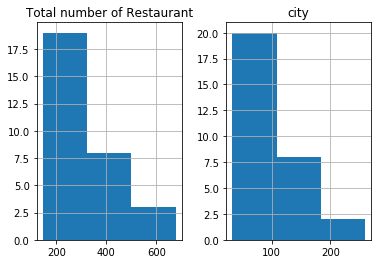

In [48]:
dfhst= pnd.concat([df1pc, dfpc], axis=1, join='inner')   # histogram of Province wise number of cities and restaurant 
dfhst.hist(bins=3)


### Pairplot of longitude and latitude

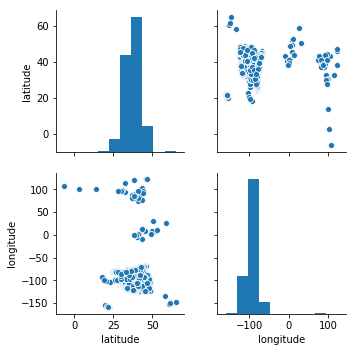

In [88]:
sns.pairplot(df);                  #Pairplot of longitude and latitude

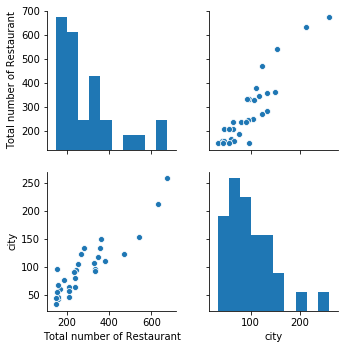

In [89]:
sns.pairplot(dfhst)                          #Pair plot of city counts and respective restaurant counts

### Bar plot of Province vs city count/ Restaurant count

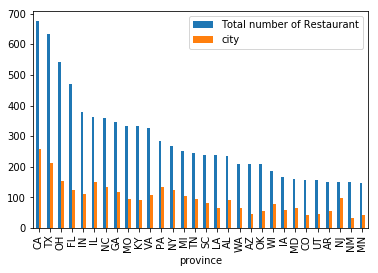

In [85]:
dfhst.plot.bar()                               

### Scatter plot of city count and restaurant count for provinces

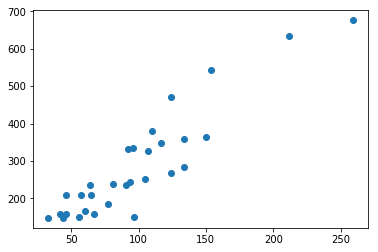

In [86]:
plt.scatter(dfhst['city'],dfhst['Total number of Restaurant'])   #Scatter plot of city count and restaurant count for provinces

### Box plot of city count and restaurant count

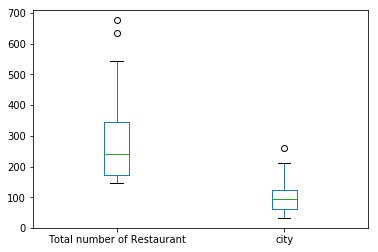

In [87]:
dfhst.plot.box()                                

### Restaurants distribution with respect to location position

In [90]:
df['Coordinates'] = list(zip(df.longitude, df.latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
print(gdf.head())

                 address                    city country  \
0            324 Main St                 Massena      US   
1        530 Clinton Ave  Washington Court House      US   
2   408 Market Square Dr               Maysville      US   
3  6098 State Highway 37                 Massena      US   
4        139 Columbus Rd                  Athens      US   

                                                keys  latitude  longitude  \
0                us/ny/massena/324mainst/-1161002137  44.92130  -74.89021   
1  us/oh/washingtoncourthouse/530clintonave/-7914...  39.53255  -83.44526   
2       us/ky/maysville/408marketsquaredr/1051460804  38.62736  -83.79141   
3       us/ny/massena/6098statehighway37/-1161002137  44.95008  -74.84553   
4               us/oh/athens/139columbusrd/990890980  39.35155  -82.09728   

               name postalCode province  \
0        McDonald's      13662       NY   
1           Wendy's      43160       OH   
2  Frisch's Big Boy      41056       KY   
3   

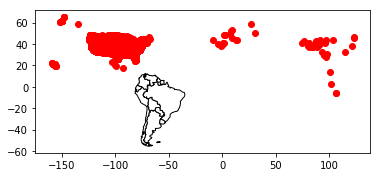

In [94]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))  # Restaurant distribution in South America
ax = world[world.continent == 'South America'].plot(           
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

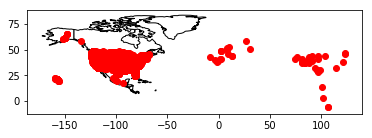

In [95]:
ax = world[world.continent == 'North America'].plot(          #Restaurant distribution in North America
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

<a id=section6></a>

### what are those provinces with lesser number of restaurants?

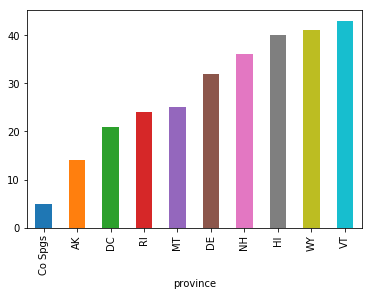

In [49]:
df11=df.groupby('province').count().sort_values(by=["keys"],ascending=True).head(10) #province with lesser number of restaurant
df11['Total Number of Restaurants']= df11['keys']
df11['Total Number of Restaurants'].plot.bar()


### Which cities have highest number of restaurant counts?

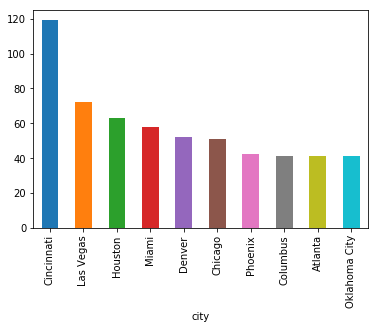

In [50]:
df2=df.groupby('city').count().sort_values(by=["keys"],ascending=False).head(10) # Restaurant count in different Cities
df2['Total number of Restaurants']= df2['keys']
df2['Total number of Restaurants'].plot.bar()

### Which cities have less number of restaurant count?

In [62]:
df22=df.groupby('city').count().sort_values(by=["keys"],ascending=True).head(10)
df22['Total number of Restaurants']= df22['keys']
df22['Total number of Restaurants']

city
Long Branch       1
Mena              1
Medicine Lodge    1
Media             1
Mechanicville     1
Mcloud            1
Mckeesport        1
Mc Farland        1
Mc Cordsville     1
Mc Calla          1
Name: Total number of Restaurants, dtype: int64

### What are those restaurants which have most number of outlet in USA?

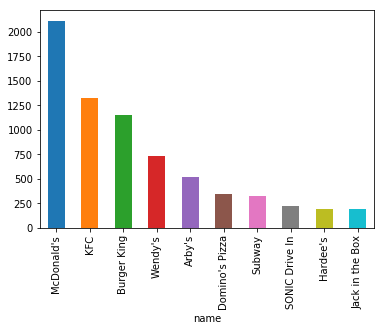

In [51]:
df3=df.groupby('name').count().sort_values(by=["keys"],ascending=False).head(10) #Restaurants with their respective counts
df3['Total count']=df3['keys']
df_rest= df3['Total count']

df_rest.plot.bar()
#df_rest.plot.line()


([<matplotlib.patches.Wedge at 0x220c4f53b70>,
 [Text(-0.4385251018737055, 1.0088090676766621, "McDonald's"),
  Text(-1.0297527071313402, -0.3867936945655609, 'KFC'),
  Text(-0.127202142051746, -1.0926205265587168, 'Burger King'),
  Text(0.7218684939024623, -0.8300035406617197, "Wendy's"),
  Text(1.0496063218361855, -0.3291300186271584, "Arby's"),
  Text(1.0967472523394624, 0.08453084931455286, "Domino's Pizza"),
  Text(1.0250717332300474, 0.39903376014160336, 'Subway'),
  Text(0.899704066322699, 0.6328764437411151, 'SONIC Drive In'),
  Text(0.7683802237162359, 0.7871415576640503, "Hardee's"),
  Text(0.6266418032012839, 0.9040575482128577, 'Jack in the Box')],
 [Text(-0.23919551011293025, 0.5502594914599975, '29.7%'),
  Text(-0.5616832947989128, -0.21097837885394227, '18.7%'),
  Text(-0.06938298657367963, -0.5959748326683909, '16.2%'),
  Text(0.39374645121952484, -0.4527292039973016, '10.3%'),
  Text(0.5725125391833739, -0.17952546470572275, '7.3%'),
  Text(0.5982257740033431, 0.046107

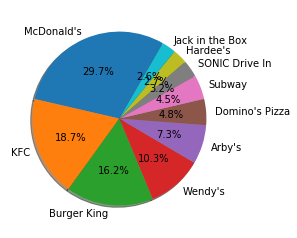

In [79]:
plt.pie(df_rest,labels=df_rest.keys(),startangle=60, autopct='%1.1f%%',shadow=True) #pie plot of count of respective Restaurant

### How many KFC restaurants are there in different cities?

In [81]:
df_kfc= df[df['name']=='KFC']                              # KFC restaurant count in different cities
df3=df_kfc.groupby(['name','city']).count().sort_values(by=["keys"],ascending=False)
df3['Total count']=df3['keys']
df3['Total count'].head(20)




name  city           
KFC   Cincinnati         21
      Houston             9
      Miami               7
      Williamsburg        7
      Denver              7
      Aberdeen            6
      Portland            6
      Saint Louis         6
      Salem               6
      Florence            6
      Columbus            6
      Chicago             6
      Washington          5
      Carrollton          5
      Fort Lauderdale     5
      Cleveland           5
      Oklahoma City       5
      Newport             5
      Belleville          5
      Franklin            5
Name: Total count, dtype: int64

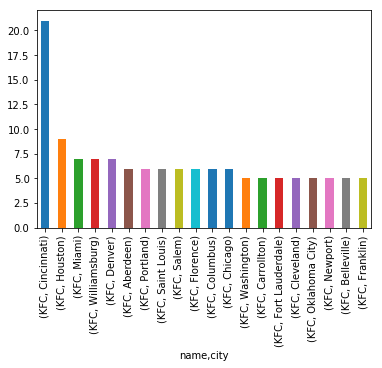

In [82]:
df3['Total count'].head(20).plot.bar()                            # Bar plot of KFC restaurant count in different cities

### How Many McDonals restaurants are there in different cities?

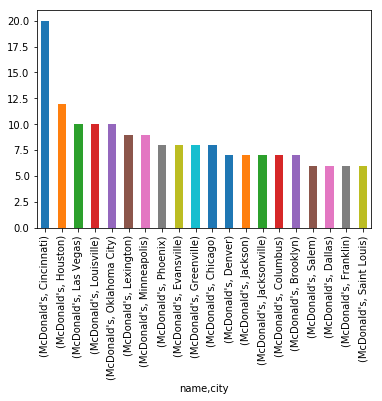

In [70]:
df_kfc= df[df['name']=="McDonald's"]                           # Bar plot of McDonalds restaurant count in different cities
df3=df_kfc.groupby(['name','city']).count().sort_values(by=["keys"],ascending=False)
df3['Total count']=df3['keys']
df3['Total count'].head(20).plot.bar()

### How many different restaurants are there in Cincinnati city?

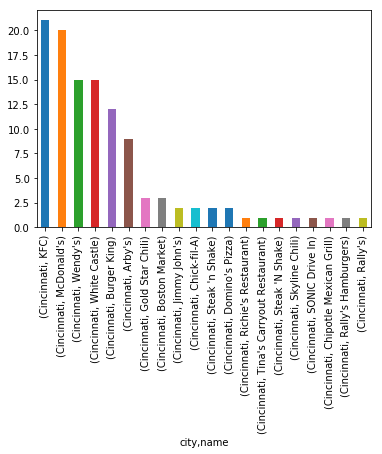

In [71]:
df_kfc= df[df['city']=="Cincinnati"]                              # Restaurants available in Cincinnati city
df3=df_kfc.groupby(['city','name']).count().sort_values(by=["keys"],ascending=False)
df3['Total count']=df3['keys']
df3['Total count'].head(20).plot.bar()


### What are those restaurants which dont have websites?

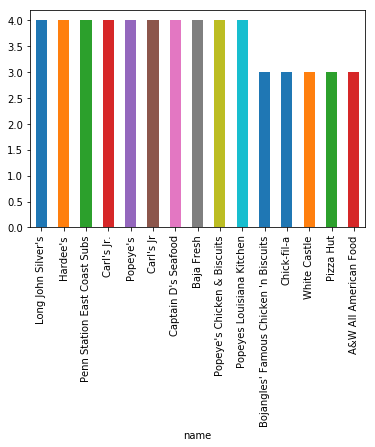

In [72]:
df_missing= df[df['websites']=="Website is missing"]        # plot to show missing websites for restaurants
df3=df_missing.groupby(['name']).count().sort_values(by=["keys"],ascending=False)
df3['Total count']=df3['keys']
df3['Total count'].head(15).plot.bar()
#df3['Total count'].head(15).plot.line()

<a id=section7></a>

<a id=section7></a>

### Conclusion

1. All the records are mainly of North America, No records for South America.
2. Those restaurants which dont have websites data in this record might not having their own websites or data is missing in this data set.
3. Some cities have very few number of restaurants. There might be some feasibility analysis on the growth of restaurant business in those cities.
4. McDonald's has the most number of restaurants in USA followed by KFC and burger king respectively.
5. Cincinnati city has the mst number of restaurant in USA.